In [4]:
from sklearn.cluster import KMeans, DBSCAN
from prepare import Prepare
from split_get_scale import SplitGetScale
import pandas as pd
import matplotlib.pyplot as plt

nutrition_facts = Prepare().get_food_prep()

sgs = SplitGetScale()
train, validate, test = sgs.split(nutrition_facts)
train_scaled, validate_scaled, test_scaled = sgs.scale(train.drop(["food_group", "calories"], axis=1), validate.drop(["food_group", "calories"], axis=1), test.drop(["food_group", "calories"], axis=1))
train_scaled.head()

,fat,protein,carbohydrate,sugars,fiber,cholesterol,saturated_fats,calcium,iron,potassium,magnesium,vitamin_a,vitamin_c,vitamin_b12,vitamin_d,vitamin_e_alphatocopherol,water,omega_3s,omega_6s,pral_score,phosphorus,sodium,zinc,copper,selenium,thiamin_b1,riboflavin_b2,niacin_b3,vitamin_b6,folate_b9,folic_acid,food_folate,folate_dfe,choline,retinol,carotene_beta,carotene_alpha,lycopene,lutein_plus_zeaxanthin,vitamin_k,fatty_acids_total_monounsaturated,fatty_acids_total_polyunsaturated,alcohol,caffeine,theobromine
5653,-0.679827,-1.036063,-0.300931,0.492466,-0.537367,-0.350203,-0.558501,-0.416059,-0.450038,-0.811608,-0.650832,-0.135566,-0.138123,0.409945,-0.148007,-0.296869,1.018601,-0.175639,-0.432520,-0.755126,-0.823591,-0.303481,-0.522053,-0.316597,-0.479409,-0.438419,-0.549280,-0.708121,1.770296,-0.376956,-0.176650,-0.482113,-0.312864,-0.574692,-0.092949,-0.237682,-0.140486,-0.15551,-0.202845,-0.232067,-0.572393,-0.452614,-0.079248,0.403413,-0.072008
9675,0.211305,0.401395,-0.153366,-0.206112,-0.018763,0.009872,0.321210,0.606675,-0.046611,-0.098200,-0.047258,-0.081624,-0.106019,0.030653,-0.085440,-0.159159,-0.136939,-0.172645,-0.023525,0.021437,0.243680,0.257249,0.384729,-0.128166,0.158436,-0.069342,-0.069183,0.074870,-0.087652,-0.092188,-0.125722,0.052281,-0.097005,0.146798,-0.049777,-0.169886,-0.105463,0.56036,-0.168559,-0.115501,0.125090,-0.030031,-0.079248,-0.030786,-0.072008
8162,0.469108,-0.850584,-0.046867,0.789298,-0.293318,0.081888,1.337468,-0.214037,-0.411291,-0.389454,-0.449640,0.114270,0.049436,-0.239124,0.070978,-0.129650,0.156620,-0.163661,-0.278106,-0.591666,-0.626832,-0.368234,-0.469864,-0.244431,-0.416367,-0.386475,-0.269224,-0.646132,-0.422313,-0.285423,-0.176650,-0.281715,-0.250196,-0.382806,0.154568,-0.199594,-0.131730,-0.15551,-0.193141,-0.207266,0.085069,-0.284011,-0.079248,-0.030786,-0.072008
7994,-0.425750,-0.883558,-0.472413,0.168339,-0.537367,-0.350203,-0.281727,-0.119340,-0.219834,-0.575987,-0.516704,-0.048975,-0.024912,-0.199058,0.164829,-0.103419,0.968116,-0.166655,-0.279986,-0.673139,-0.674531,-0.390277,-0.342654,-0.192312,-0.405241,-0.255248,-0.280654,-0.529522,-0.488668,-0.275253,-0.049330,-0.482113,-0.194490,-0.265756,-0.005167,-0.237682,-0.140486,-0.15551,-0.202845,-0.165103,-0.362114,-0.294534,-0.079248,-0.030786,-0.072008
10728,0.223227,-0.781545,0.905760,1.042629,0.072756,-0.350203,0.023131,-0.365553,-0.190204,-0.582532,-0.471995,-0.135566,-0.112777,-0.257822,-0.148007,-0.037843,-0.548297,0.051954,0.435688,-0.687147,-0.644719,-0.095446,-0.456817,-0.182289,-0.193862,-0.036535,-0.226358,-0.390047,-0.572333,-0.071847,0.128918,-0.348515,0.014406,-0.488343,-0.092949,-0.233873,-0.140486,-0.15551,-0.189907,-0.129141,0.264315,0.375094,-0.079248,-0.030786,-0.072008


In [5]:
def get_k_val_from_elbow(df):
    '''Takes in a dataframe and a list of features to cluster on and returns a plot of K value against the inertia'''
    output = {}

    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        output[k] = kmeans.inertia_

    ax = pd.Series(output).plot(figsize=(13, 7))
    ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 20), title='The elbow method for determining k')
    ax.grid()

In [6]:
features = ["protein", "carbohydrate", "calcium", "iron", "fiber", "water"]
features1 = ["fat", "sugars", "saturated_fats", "alcohol", "caffeine"]
features2 = ["vitamin_a", "vitamin_c", "vitamin_b12", "vitamin_d", "vitamin_e_alphatocopherol", "thiamin_b1", "riboflavin_b2", "niacin_b3", "vitamin_b6", "folate_b9", "vitamin_k"]

clusters_train1 = train_scaled[features]
clusters_validate1 = validate_scaled[features]
clusters_test1 = test_scaled[features]

clusters_train2 = train_scaled[features1]
clusters_validate2 = validate_scaled[features1]
clusters_test2 = test_scaled[features1]

clusters_train3 = train_scaled[features2]
clusters_validate3 = validate_scaled[features2]
clusters_test3 = test_scaled[features2]

### Using clusters_train1

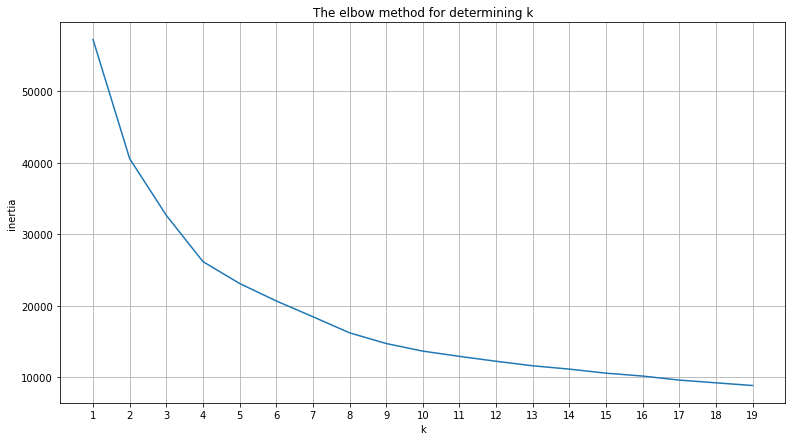

In [7]:
get_k_val_from_elbow(clusters_train1)

In [8]:
# creating the object
kmeans1 = KMeans(n_clusters=6, max_iter=500)

# fitting the object
kmeans1.fit(clusters_train1)

#predicting using the kmeans object
y_kmeans1 = kmeans1.predict(clusters_train1)

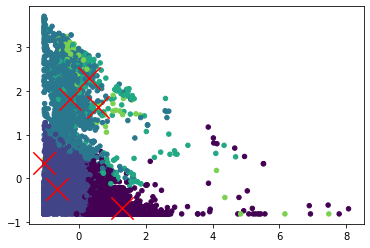

In [9]:
plt.scatter(clusters_train1.iloc[:, 0], clusters_train1.iloc[:, 1], c=y_kmeans1, s=20, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')

In [10]:
train_scaled["feat_cluster"] = y_kmeans1

In [11]:
train_scaled.head()

,fat,protein,carbohydrate,sugars,fiber,cholesterol,saturated_fats,calcium,iron,potassium,magnesium,vitamin_a,vitamin_c,vitamin_b12,vitamin_d,vitamin_e_alphatocopherol,water,omega_3s,omega_6s,pral_score,phosphorus,sodium,zinc,copper,selenium,thiamin_b1,riboflavin_b2,niacin_b3,vitamin_b6,folate_b9,folic_acid,food_folate,folate_dfe,choline,retinol,carotene_beta,carotene_alpha,lycopene,lutein_plus_zeaxanthin,vitamin_k,fatty_acids_total_monounsaturated,fatty_acids_total_polyunsaturated,alcohol,caffeine,theobromine,feat_cluster
5653,-0.679827,-1.036063,-0.300931,0.492466,-0.537367,-0.350203,-0.558501,-0.416059,-0.450038,-0.811608,-0.650832,-0.135566,-0.138123,0.409945,-0.148007,-0.296869,1.018601,-0.175639,-0.432520,-0.755126,-0.823591,-0.303481,-0.522053,-0.316597,-0.479409,-0.438419,-0.549280,-0.708121,1.770296,-0.376956,-0.176650,-0.482113,-0.312864,-0.574692,-0.092949,-0.237682,-0.140486,-0.15551,-0.202845,-0.232067,-0.572393,-0.452614,-0.079248,0.403413,-0.072008,1
9675,0.211305,0.401395,-0.153366,-0.206112,-0.018763,0.009872,0.321210,0.606675,-0.046611,-0.098200,-0.047258,-0.081624,-0.106019,0.030653,-0.085440,-0.159159,-0.136939,-0.172645,-0.023525,0.021437,0.243680,0.257249,0.384729,-0.128166,0.158436,-0.069342,-0.069183,0.074870,-0.087652,-0.092188,-0.125722,0.052281,-0.097005,0.146798,-0.049777,-0.169886,-0.105463,0.56036,-0.168559,-0.115501,0.125090,-0.030031,-0.079248,-0.030786,-0.072008,0
8162,0.469108,-0.850584,-0.046867,0.789298,-0.293318,0.081888,1.337468,-0.214037,-0.411291,-0.389454,-0.449640,0.114270,0.049436,-0.239124,0.070978,-0.129650,0.156620,-0.163661,-0.278106,-0.591666,-0.626832,-0.368234,-0.469864,-0.244431,-0.416367,-0.386475,-0.269224,-0.646132,-0.422313,-0.285423,-0.176650,-0.281715,-0.250196,-0.382806,0.154568,-0.199594,-0.131730,-0.15551,-0.193141,-0.207266,0.085069,-0.284011,-0.079248,-0.030786,-0.072008,1
7994,-0.425750,-0.883558,-0.472413,0.168339,-0.537367,-0.350203,-0.281727,-0.119340,-0.219834,-0.575987,-0.516704,-0.048975,-0.024912,-0.199058,0.164829,-0.103419,0.968116,-0.166655,-0.279986,-0.673139,-0.674531,-0.390277,-0.342654,-0.192312,-0.405241,-0.255248,-0.280654,-0.529522,-0.488668,-0.275253,-0.049330,-0.482113,-0.194490,-0.265756,-0.005167,-0.237682,-0.140486,-0.15551,-0.202845,-0.165103,-0.362114,-0.294534,-0.079248,-0.030786,-0.072008,1
10728,0.223227,-0.781545,0.905760,1.042629,0.072756,-0.350203,0.023131,-0.365553,-0.190204,-0.582532,-0.471995,-0.135566,-0.112777,-0.257822,-0.148007,-0.037843,-0.548297,0.051954,0.435688,-0.687147,-0.644719,-0.095446,-0.456817,-0.182289,-0.193862,-0.036535,-0.226358,-0.390047,-0.572333,-0.071847,0.128918,-0.348515,0.014406,-0.488343,-0.092949,-0.233873,-0.140486,-0.15551,-0.189907,-0.129141,0.264315,0.375094,-0.079248,-0.030786,-0.072008,1


### Viz and Stats Test for Features Clusters

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

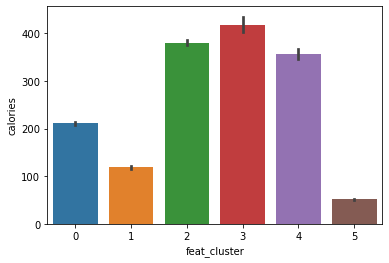

In [15]:
train_scaled["calories"] = train["calories"]
sns.barplot(x=train_scaled["feat_cluster"], y=train_scaled["calories"]);

<p>H_o: all 6 groups have the same population mean</p>
<p>H_a: at least 1 has different mean</p>
<p>Signifcance Level: 0.05</p>

In [33]:
from scipy.stats import f_oneway

feat_cluster_0 = train_scaled["calories"][train_scaled["feat_cluster"] == 0]
feat_cluster_1 = train_scaled["calories"][train_scaled["feat_cluster"] == 1]
feat_cluster_2 = train_scaled["calories"][train_scaled["feat_cluster"] == 2]
feat_cluster_3 = train_scaled["calories"][train_scaled["feat_cluster"] == 3]
feat_cluster_4 = train_scaled["calories"][train_scaled["feat_cluster"] == 4]
feat_cluster_5 = train_scaled["calories"][train_scaled["feat_cluster"] == 5]

f, p = f_oneway(feat_cluster_0, feat_cluster_1, feat_cluster_2, feat_cluster_3, feat_cluster_4, feat_cluster_5, axis=0)
f, p

(1433.5943575394688, 0.0)

### Using clusters_train2

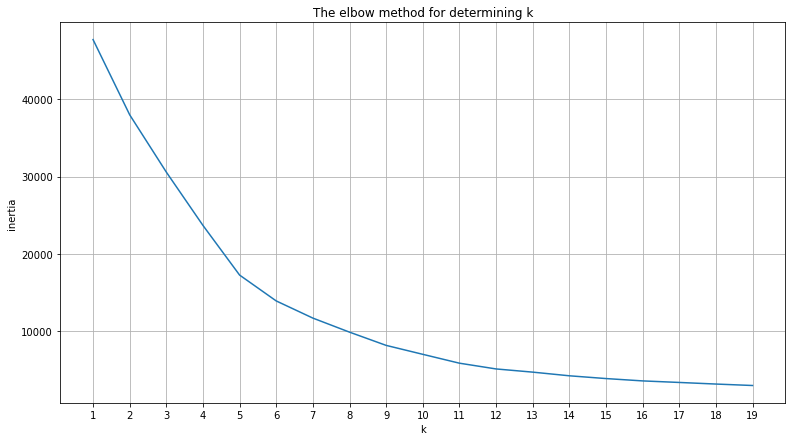

In [17]:
get_k_val_from_elbow(clusters_train2)

In [18]:
# creating the object
kmeans2 = KMeans(n_clusters=5, max_iter=500)

# fitting the object
kmeans2.fit(clusters_train2)

#predicting using the kmeans object
y_kmeans2 = kmeans2.predict(clusters_train2)

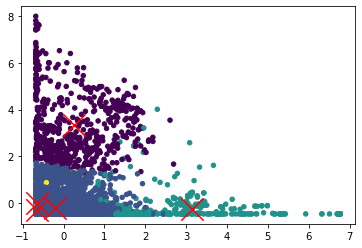

In [19]:
plt.scatter(clusters_train2.iloc[:, 0], clusters_train2.iloc[:, 1], c=y_kmeans2, s=20, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')

In [27]:
train_scaled["feat1_cluster"] = y_kmeans2
train_scaled.head()

,fat,protein,carbohydrate,sugars,fiber,cholesterol,saturated_fats,calcium,iron,potassium,magnesium,vitamin_a,vitamin_c,vitamin_b12,vitamin_d,vitamin_e_alphatocopherol,water,omega_3s,omega_6s,pral_score,phosphorus,sodium,zinc,copper,selenium,thiamin_b1,riboflavin_b2,niacin_b3,vitamin_b6,folate_b9,folic_acid,food_folate,folate_dfe,choline,retinol,carotene_beta,carotene_alpha,lycopene,lutein_plus_zeaxanthin,vitamin_k,fatty_acids_total_monounsaturated,fatty_acids_total_polyunsaturated,alcohol,caffeine,theobromine,feat_cluster,calories,feat1_cluster,feat2_cluster
5653,-0.679827,-1.036063,-0.300931,0.492466,-0.537367,-0.350203,-0.558501,-0.416059,-0.450038,-0.811608,-0.650832,-0.135566,-0.138123,0.409945,-0.148007,-0.296869,1.018601,-0.175639,-0.432520,-0.755126,-0.823591,-0.303481,-0.522053,-0.316597,-0.479409,-0.438419,-0.549280,-0.708121,1.770296,-0.376956,-0.176650,-0.482113,-0.312864,-0.574692,-0.092949,-0.237682,-0.140486,-0.15551,-0.202845,-0.232067,-0.572393,-0.452614,-0.079248,0.403413,-0.072008,1,44.0,1,0
9675,0.211305,0.401395,-0.153366,-0.206112,-0.018763,0.009872,0.321210,0.606675,-0.046611,-0.098200,-0.047258,-0.081624,-0.106019,0.030653,-0.085440,-0.159159,-0.136939,-0.172645,-0.023525,0.021437,0.243680,0.257249,0.384729,-0.128166,0.158436,-0.069342,-0.069183,0.074870,-0.087652,-0.092188,-0.125722,0.052281,-0.097005,0.146798,-0.049777,-0.169886,-0.105463,0.56036,-0.168559,-0.115501,0.125090,-0.030031,-0.079248,-0.030786,-0.072008,0,223.0,1,0
8162,0.469108,-0.850584,-0.046867,0.789298,-0.293318,0.081888,1.337468,-0.214037,-0.411291,-0.389454,-0.449640,0.114270,0.049436,-0.239124,0.070978,-0.129650,0.156620,-0.163661,-0.278106,-0.591666,-0.626832,-0.368234,-0.469864,-0.244431,-0.416367,-0.386475,-0.269224,-0.646132,-0.422313,-0.285423,-0.176650,-0.281715,-0.250196,-0.382806,0.154568,-0.199594,-0.131730,-0.15551,-0.193141,-0.207266,0.085069,-0.284011,-0.079248,-0.030786,-0.072008,1,207.0,1,0
7994,-0.425750,-0.883558,-0.472413,0.168339,-0.537367,-0.350203,-0.281727,-0.119340,-0.219834,-0.575987,-0.516704,-0.048975,-0.024912,-0.199058,0.164829,-0.103419,0.968116,-0.166655,-0.279986,-0.673139,-0.674531,-0.390277,-0.342654,-0.192312,-0.405241,-0.255248,-0.280654,-0.529522,-0.488668,-0.275253,-0.049330,-0.482113,-0.194490,-0.265756,-0.005167,-0.237682,-0.140486,-0.15551,-0.202845,-0.165103,-0.362114,-0.294534,-0.079248,-0.030786,-0.072008,1,67.0,1,0
10728,0.223227,-0.781545,0.905760,1.042629,0.072756,-0.350203,0.023131,-0.365553,-0.190204,-0.582532,-0.471995,-0.135566,-0.112777,-0.257822,-0.148007,-0.037843,-0.548297,0.051954,0.435688,-0.687147,-0.644719,-0.095446,-0.456817,-0.182289,-0.193862,-0.036535,-0.226358,-0.390047,-0.572333,-0.071847,0.128918,-0.348515,0.014406,-0.488343,-0.092949,-0.233873,-0.140486,-0.15551,-0.189907,-0.129141,0.264315,0.375094,-0.079248,-0.030786,-0.072008,1,267.0,1,0


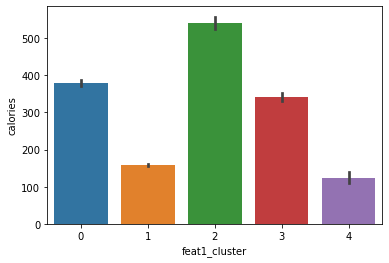

In [22]:
sns.barplot(x=train_scaled["feat1_cluster"], y=train_scaled["calories"]);

In [34]:
feat1_cluster_0 = train_scaled["calories"][train_scaled["feat1_cluster"] == 0]
feat1_cluster_1 = train_scaled["calories"][train_scaled["feat1_cluster"] == 1]
feat1_cluster_2 = train_scaled["calories"][train_scaled["feat1_cluster"] == 2]
feat1_cluster_3 = train_scaled["calories"][train_scaled["feat1_cluster"] == 3]
feat1_cluster_4 = train_scaled["calories"][train_scaled["feat1_cluster"] == 4]

f, p = f_oneway(feat1_cluster_0, feat1_cluster_1, feat1_cluster_2, feat1_cluster_3, feat1_cluster_4, axis=0)
f, p

(1882.6632133912915, 0.0)

### Using clusters_train_3

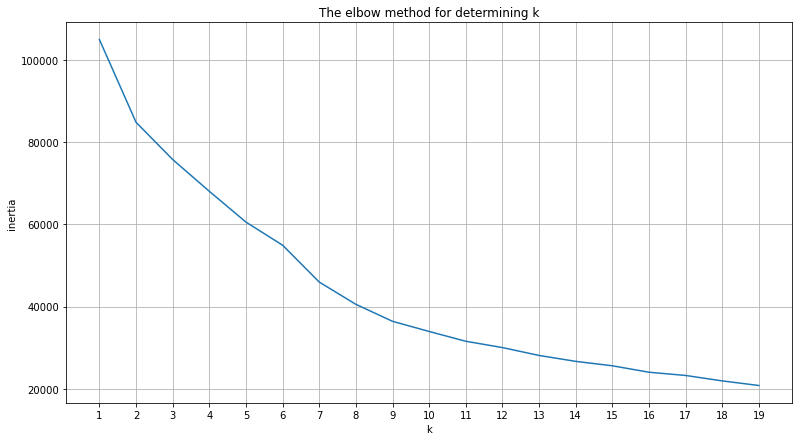

In [23]:
get_k_val_from_elbow(clusters_train3)

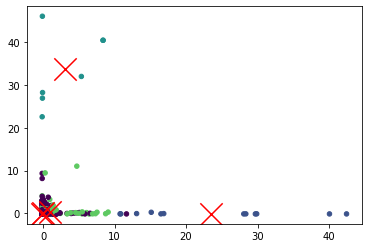

In [24]:
# creating the object
kmeans3 = KMeans(n_clusters=5, max_iter=500)

# fitting the object
kmeans3.fit(clusters_train3)

#predicting using the kmeans object
y_kmeans3 = kmeans3.predict(clusters_train3)

plt.scatter(clusters_train3.iloc[:, 0], clusters_train3.iloc[:, 1], c=y_kmeans3, s=20, cmap='viridis')
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')

In [26]:
train_scaled["feat2_cluster"] = y_kmeans3
train_scaled.head()

,fat,protein,carbohydrate,sugars,fiber,cholesterol,saturated_fats,calcium,iron,potassium,magnesium,vitamin_a,vitamin_c,vitamin_b12,vitamin_d,vitamin_e_alphatocopherol,water,omega_3s,omega_6s,pral_score,phosphorus,sodium,zinc,copper,selenium,thiamin_b1,riboflavin_b2,niacin_b3,vitamin_b6,folate_b9,folic_acid,food_folate,folate_dfe,choline,retinol,carotene_beta,carotene_alpha,lycopene,lutein_plus_zeaxanthin,vitamin_k,fatty_acids_total_monounsaturated,fatty_acids_total_polyunsaturated,alcohol,caffeine,theobromine,feat_cluster,calories,feat1_cluster,feat2_cluster
5653,-0.679827,-1.036063,-0.300931,0.492466,-0.537367,-0.350203,-0.558501,-0.416059,-0.450038,-0.811608,-0.650832,-0.135566,-0.138123,0.409945,-0.148007,-0.296869,1.018601,-0.175639,-0.432520,-0.755126,-0.823591,-0.303481,-0.522053,-0.316597,-0.479409,-0.438419,-0.549280,-0.708121,1.770296,-0.376956,-0.176650,-0.482113,-0.312864,-0.574692,-0.092949,-0.237682,-0.140486,-0.15551,-0.202845,-0.232067,-0.572393,-0.452614,-0.079248,0.403413,-0.072008,1,44.0,1,0
9675,0.211305,0.401395,-0.153366,-0.206112,-0.018763,0.009872,0.321210,0.606675,-0.046611,-0.098200,-0.047258,-0.081624,-0.106019,0.030653,-0.085440,-0.159159,-0.136939,-0.172645,-0.023525,0.021437,0.243680,0.257249,0.384729,-0.128166,0.158436,-0.069342,-0.069183,0.074870,-0.087652,-0.092188,-0.125722,0.052281,-0.097005,0.146798,-0.049777,-0.169886,-0.105463,0.56036,-0.168559,-0.115501,0.125090,-0.030031,-0.079248,-0.030786,-0.072008,0,223.0,1,0
8162,0.469108,-0.850584,-0.046867,0.789298,-0.293318,0.081888,1.337468,-0.214037,-0.411291,-0.389454,-0.449640,0.114270,0.049436,-0.239124,0.070978,-0.129650,0.156620,-0.163661,-0.278106,-0.591666,-0.626832,-0.368234,-0.469864,-0.244431,-0.416367,-0.386475,-0.269224,-0.646132,-0.422313,-0.285423,-0.176650,-0.281715,-0.250196,-0.382806,0.154568,-0.199594,-0.131730,-0.15551,-0.193141,-0.207266,0.085069,-0.284011,-0.079248,-0.030786,-0.072008,1,207.0,1,0
7994,-0.425750,-0.883558,-0.472413,0.168339,-0.537367,-0.350203,-0.281727,-0.119340,-0.219834,-0.575987,-0.516704,-0.048975,-0.024912,-0.199058,0.164829,-0.103419,0.968116,-0.166655,-0.279986,-0.673139,-0.674531,-0.390277,-0.342654,-0.192312,-0.405241,-0.255248,-0.280654,-0.529522,-0.488668,-0.275253,-0.049330,-0.482113,-0.194490,-0.265756,-0.005167,-0.237682,-0.140486,-0.15551,-0.202845,-0.165103,-0.362114,-0.294534,-0.079248,-0.030786,-0.072008,1,67.0,1,0
10728,0.223227,-0.781545,0.905760,1.042629,0.072756,-0.350203,0.023131,-0.365553,-0.190204,-0.582532,-0.471995,-0.135566,-0.112777,-0.257822,-0.148007,-0.037843,-0.548297,0.051954,0.435688,-0.687147,-0.644719,-0.095446,-0.456817,-0.182289,-0.193862,-0.036535,-0.226358,-0.390047,-0.572333,-0.071847,0.128918,-0.348515,0.014406,-0.488343,-0.092949,-0.233873,-0.140486,-0.15551,-0.189907,-0.129141,0.264315,0.375094,-0.079248,-0.030786,-0.072008,1,267.0,1,0


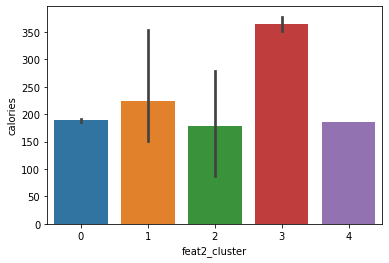

In [28]:
sns.barplot(x=train_scaled["feat2_cluster"], y=train_scaled["calories"]);

In [35]:
feat2_cluster_0 = train_scaled["calories"][train_scaled["feat2_cluster"] == 0]
feat2_cluster_1 = train_scaled["calories"][train_scaled["feat2_cluster"] == 1]
feat2_cluster_2 = train_scaled["calories"][train_scaled["feat2_cluster"] == 2]
feat2_cluster_3 = train_scaled["calories"][train_scaled["feat2_cluster"] == 3]
feat2_cluster_4 = train_scaled["calories"][train_scaled["feat2_cluster"] == 4]

f, p = f_oneway(feat2_cluster_0, feat2_cluster_1, feat2_cluster_2, feat2_cluster_3, feat2_cluster_4, axis=0)
f, p

(63.09504864741121, 1.0045936007345153e-52)